In [0]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [0]:
import os
import pandas as pd
import numpy as np

train = pd.read_csv('sign_mnist_train.csv')  
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])


from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.losses import categorical_crossentropy
batch_size = 128
num_classes = 24
epochs = 30

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 42)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)/255

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     shear_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1) 


datagen = ImageDataGenerator() 
datagen.fit(x_train)


model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = categorical_crossentropy, optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)               

In [0]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=len(x_train) / 128, validation_data = (x_test, y_test), epochs=epochs )


Epoch 1/30
151/150 [==============================] - 3s 19ms/step - loss: 2.5772 - accuracy: 0.2051 - val_loss: 1.6457 - val_accuracy: 0.4766
Epoch 2/30
151/150 [==============================] - 3s 17ms/step - loss: 1.2933 - accuracy: 0.5740 - val_loss: 0.8843 - val_accuracy: 0.7196
Epoch 3/30
151/150 [==============================] - 3s 17ms/step - loss: 0.8114 - accuracy: 0.7268 - val_loss: 0.6185 - val_accuracy: 0.7996
Epoch 4/30
151/150 [==============================] - 3s 18ms/step - loss: 0.5855 - accuracy: 0.8002 - val_loss: 0.4023 - val_accuracy: 0.8765
Epoch 5/30
151/150 [==============================] - 3s 17ms/step - loss: 0.4324 - accuracy: 0.8527 - val_loss: 0.3082 - val_accuracy: 0.9029
Epoch 6/30
151/150 [==============================] - 3s 18ms/step - loss: 0.3148 - accuracy: 0.8920 - val_loss: 0.1962 - val_accuracy: 0.9414
Epoch 7/30
151/150 [==============================] - 3s 17ms/step - loss: 0.2341 - accuracy: 0.9212 - val_loss: 0.1400 - val_accuracy: 0.9622

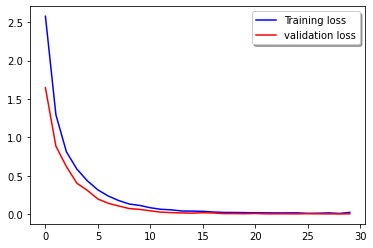

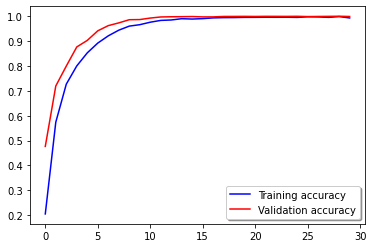

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()


In [0]:
test = pd.read_csv('sign_mnist_test.csv')  
labels_true = test['label'].values
test.drop('label', axis=1, inplace=True)
images = test.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images.reshape(images.shape[0], 28, 28, 1)/255

labels = label_binarizer.fit_transform(labels_true)
score, acc = model.evaluate(images, labels)
acc

225/225 [==============================] - 1s 4ms/step - loss: 0.5570 - accuracy: 0.9024


0.9023982286453247

In [0]:
import cv2
from tensorflow.python.keras.layers import Flatten
train = pd.read_csv('sign_mnist_train.csv')  
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images3d = []
for i in range(0, len(images)):
  images3d.append(images[i][:, :, None] * np.ones(3, dtype=int)[None, None, :])
images3d = np.array(images3d)
images3d_resized = np.array([cv2.resize(np.array(i,dtype='uint8'), (32, 32)) for i in images3d])

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
x_train, x_test, y_train, y_test = train_test_split(images3d_resized, labels, test_size = 0.3, random_state = 42)

datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

datagen.fit(x_train)

from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Model
import cv2

base_model=VGG16(weights='imagenet',include_top=False, input_shape=(32,32,3)) #imports the mobilenet model and discards the last 1000 neuron layer.


x=base_model.output
x=Flatten()(x)
x=Dense(128,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(64,activation='relu')(x) #dense layer 3
preds=Dense(24,activation='softmax')(x) #final layer with softmax activationcallbacks=callbacks
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
model.compile(loss = categorical_crossentropy, optimizer='adam',
              metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), steps_per_epoch=len(x_train) / 128, validation_data = (x_test, y_test), epochs=24 )

Epoch 1/24
151/150 [==============================] - 20s 131ms/step - loss: 2.5757 - accuracy: 0.4173 - val_loss: 0.9338 - val_accuracy: 0.7063
Epoch 2/24
151/150 [==============================] - 19s 127ms/step - loss: 1.0005 - accuracy: 0.6850 - val_loss: 0.5010 - val_accuracy: 0.8288
Epoch 3/24
151/150 [==============================] - 18s 122ms/step - loss: 0.7023 - accuracy: 0.7701 - val_loss: 0.3644 - val_accuracy: 0.8770
Epoch 4/24
151/150 [==============================] - 18s 122ms/step - loss: 0.5490 - accuracy: 0.8157 - val_loss: 0.2371 - val_accuracy: 0.9228
Epoch 5/24
151/150 [==============================] - 19s 127ms/step - loss: 0.4692 - accuracy: 0.8459 - val_loss: 0.2115 - val_accuracy: 0.9262
Epoch 6/24
151/150 [==============================] - 18s 122ms/step - loss: 0.4142 - accuracy: 0.8597 - val_loss: 0.1645 - val_accuracy: 0.9398
Epoch 7/24
151/150 [==============================] - 19s 123ms/step - loss: 0.3652 - accuracy: 0.8764 - val_loss: 0.1647 - val_ac

In [0]:
test = pd.read_csv('sign_mnist_test.csv')  
labels_true = test['label'].values
test.drop('label', axis=1, inplace=True)
images = test.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images3d = []
for i in range(0, len(images)):
  images3d.append(images[i][:, :, None] * np.ones(3, dtype=int)[None, None, :])
images3d = np.array(images3d)
images3d_resized = np.array([cv2.resize(np.array(i,dtype='uint8'), (32, 32)) for i in images3d])

labels = label_binarizer.fit_transform(labels_true)
score, acc = model.evaluate(images3d_resized, labels)
acc

225/225 [==============================] - 4s 18ms/step - loss: 0.2009 - accuracy: 0.9304


0.9304238557815552

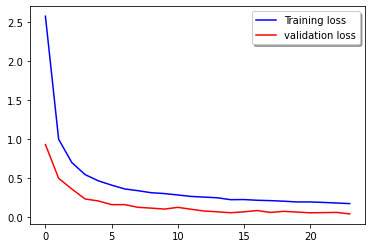

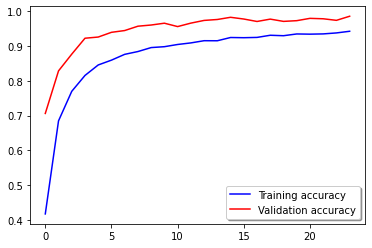

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [0]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   